In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df = df.iloc[:,2:]

In [4]:
df.drop(labels=['size','lat','long','posting_date'],inplace=True,axis=1)

In [5]:
df.dropna(subset=['cylinders','condition','drive','type'],how='all',inplace=True)

showing outlier here

In [6]:
def box_plot(name):
    # Create subplots to display multiple box plots side by side
    plt.figure(figsize=(8, 4))

    # Box plot for 'price' column
    sns.boxplot(x=df[name], color='lightblue')
    plt.xlabel(name)
    plt.title(f'Box Plot of {name}')

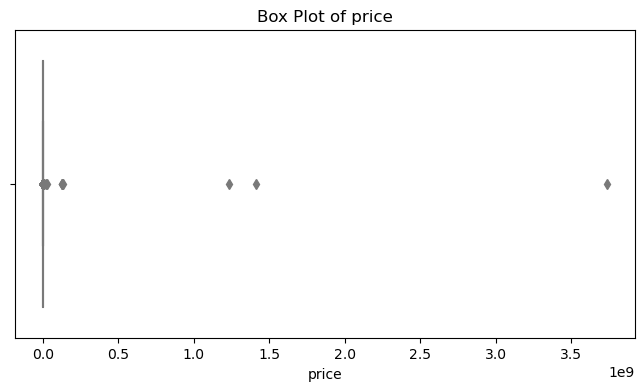

In [7]:
box_plot('price')

In [8]:
def IQR(name):
    global new_df
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    print(f"Q1  {name}  {Q1}, Q3  {name}  {Q3}")
    print("---------------------------------------")
    iqr = Q3 - Q1
    print(f"IQR for {name} is equal to {iqr}")
    print("---------------------------------------")
    upper_limit = Q1 + 1.5 * iqr
    lower_limit = df[name].quantile(0.15)
    
    return (upper_limit,lower_limit)

In [9]:
upper_limit_price,lower_limit_price =IQR('price')

Q1  price  6200.0, Q3  price  26990.0
---------------------------------------
IQR for price is equal to 20790.0
---------------------------------------


In [10]:
df = df[(df['price'] < upper_limit_price) & (df['price'] > 0)]

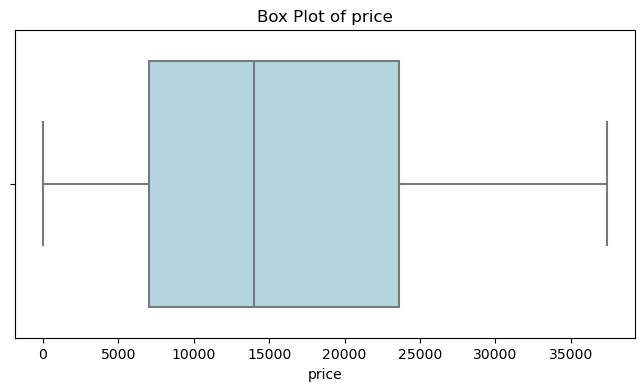

In [11]:
box_plot('price')

In [12]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [13]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 89585.31
Excellent average odometer: 109971.1
Good average odometer: 90170.23
Fair average odometer: 212998.09
Salvage average odometer: 243675.63


In [14]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [15]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [16]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
cylinders,7039600,32.705
drive,4868600,22.619
paint_color,4772700,22.173
type,2812200,13.065
manufacturer,735400,3.417
title_status,451100,2.096
fuel,122100,0.567
year,0,0.000
model,0,0.000
condition,0,0.000


In [17]:
df['condition']

0         excellent
1           salvage
2           salvage
4              good
5         excellent
            ...    
290119         good
290120          new
290125         good
290126    excellent
290127         good
Name: condition, Length: 215246, dtype: object

In [18]:
manufacturer_values = df['manufacturer'].value_counts()

In [19]:
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

In [20]:
model_values = df['model'].value_counts()
df['model'] = df['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [21]:
df['model']

0           others
1           others
2           others
4             rav4
5             f150
            ...   
290119        2500
290120      others
290125      others
290126      others
290127    wrangler
Name: model, Length: 215246, dtype: object

In [22]:
price_percentile25 = df['price'].quantile(0.25)
price_percentile75 = df['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = df['price'].quantile(0.15)
df = df[(df['price'] < price_upper_limit) & (df['price'] > price_lower_limit)]

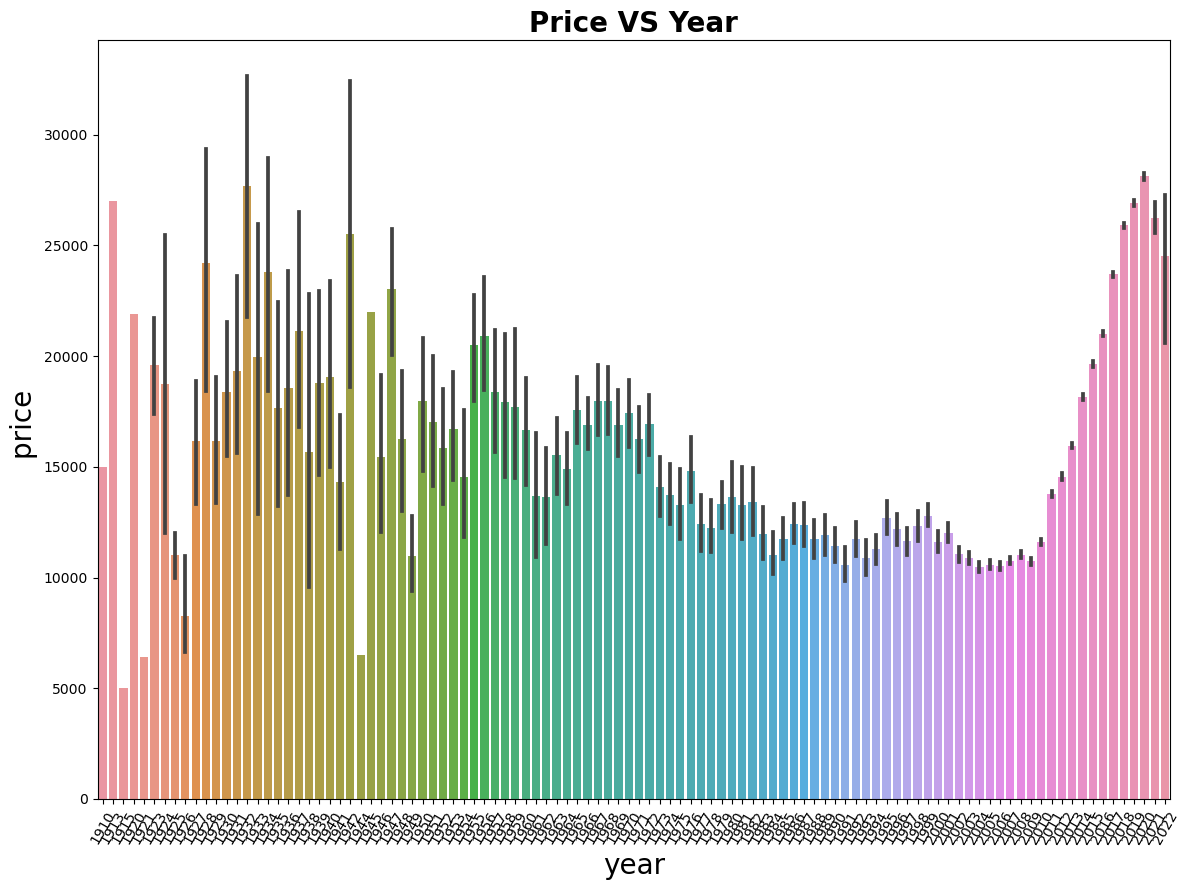

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df['year'] = df['year'].astype(int)
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y=df['price'],x=df['year'])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

In [24]:
df = df[df['year'] > 1996]
df.shape

(176280, 14)

In [25]:
df['year'] = 2023 - df['year']



In [26]:
df['year']

0         16
1         15
2         20
4         15
5         13
          ..
290118    12
290119    10
290120     4
290125    10
290126    10
Name: year, Length: 176280, dtype: int32

In [27]:
model_values = df['model'].value_counts()
df['model'] = df['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [28]:
for i in df.columns:
    print(i, len(df[i].value_counts().index))

year 26
manufacturer 21
model 50
condition 6
cylinders 8
fuel 5
odometer 61716
title_status 6
transmission 3
drive 3
type 13
paint_color 12
state 51
price 8712


## cylinders

In [29]:
# Changing cylinders of electric cars to 0 
df['cylinders'] = df.apply(lambda row: 'other' if pd.isnull(row['cylinders']) and row['fuel'] == 'electric' else row['cylinders'], axis=1)


df['cylinders'] = df.groupby(['manufacturer', 'model'])['cylinders'].ffill()

# Group by 'manufacturer' and 'cylinders' and fill missing values in 'cylinders' using forward-fill method
df['cylinders'] = df.groupby('manufacturer')['cylinders'].transform(lambda x: x.ffill().fillna('6 cylinders'))

In [30]:
cy = df.cylinders.value_counts()

In [31]:
#df['cylinders'] = df['cylinders'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].apply(lambda x: x if str(x) in cy[:9] else 'other')

In [32]:
df.cylinders.value_counts()

other           64031
6 cylinders     43798
4 cylinders     38351
8 cylinders     28398
5 cylinders       776
10 cylinders      601
3 cylinders       276
12 cylinders       49
Name: cylinders, dtype: int64

-----------------

# Fuel

In [33]:
df['fuel'].unique()

array(['gas', 'other', 'diesel', 'electric', nan, 'hybrid'], dtype=object)

In [34]:
df['fuel'].isnull().sum()

1187

In [35]:

# Group by manufacturer and model, then fill null values in 'fuel' with the corresponding non-null value
df['fuel'] = df.groupby(['manufacturer', 'model'])['fuel'].ffill()
df['type'] = df['type'].fillna(method='ffill')

In [36]:
df['fuel'].isnull().sum()

0

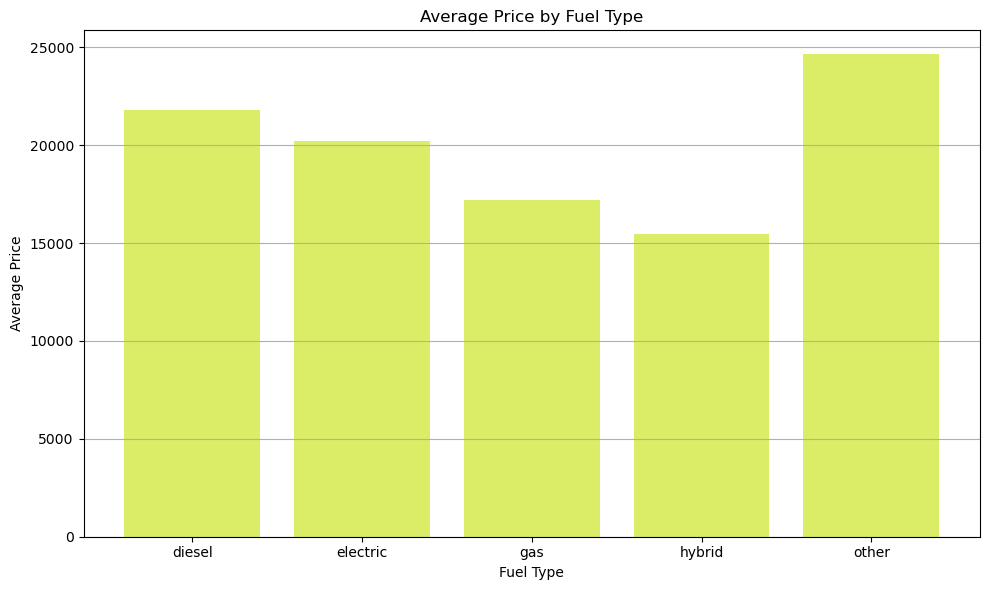

In [37]:
# Group by 'fuel' and calculate the average 'price' for each category
price_avg = df.groupby('fuel')['price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(price_avg['fuel'], price_avg['price'])
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Price by Fuel Type')
plt.grid(axis='y')
plt.show()


o

In [38]:
df['odometer'].unique()
df['odometer'].isnull().sum()

0

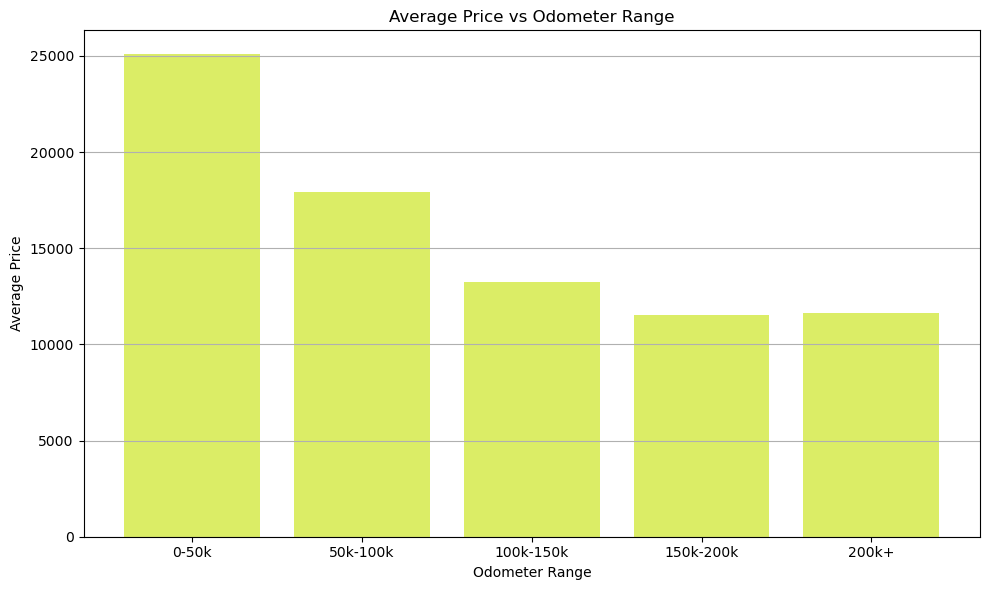

In [39]:
# Define the ranges for 'Odometer'
odom_ranges = [0, 50000, 100000, 150000, 200000, df['odometer'].max()]

# Label for each range
odom_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']

# Bin the 'Odometer' column and calculate the average 'price' for each range
df['Odometer_Range'] = pd.cut(df['odometer'], bins=odom_ranges, labels=odom_labels, right=False)
price_avg = df.groupby('Odometer_Range')['price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(price_avg['Odometer_Range'], price_avg['price'])
plt.xlabel('Odometer Range')
plt.ylabel('Average Price')
plt.title('Average Price vs Odometer Range')
plt.grid(axis='y')
plt.show()

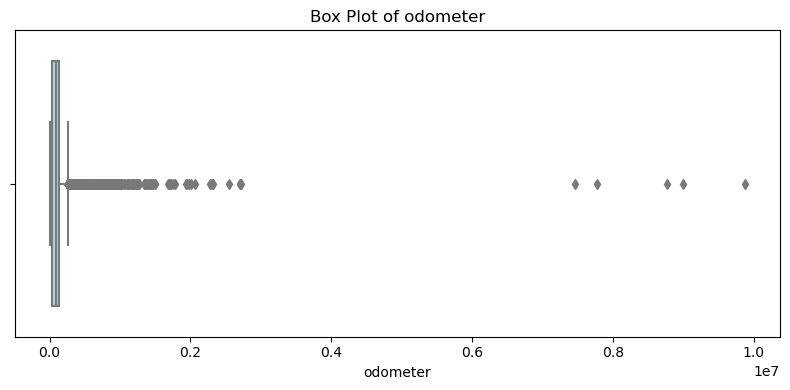

In [40]:
box_plot('odometer')

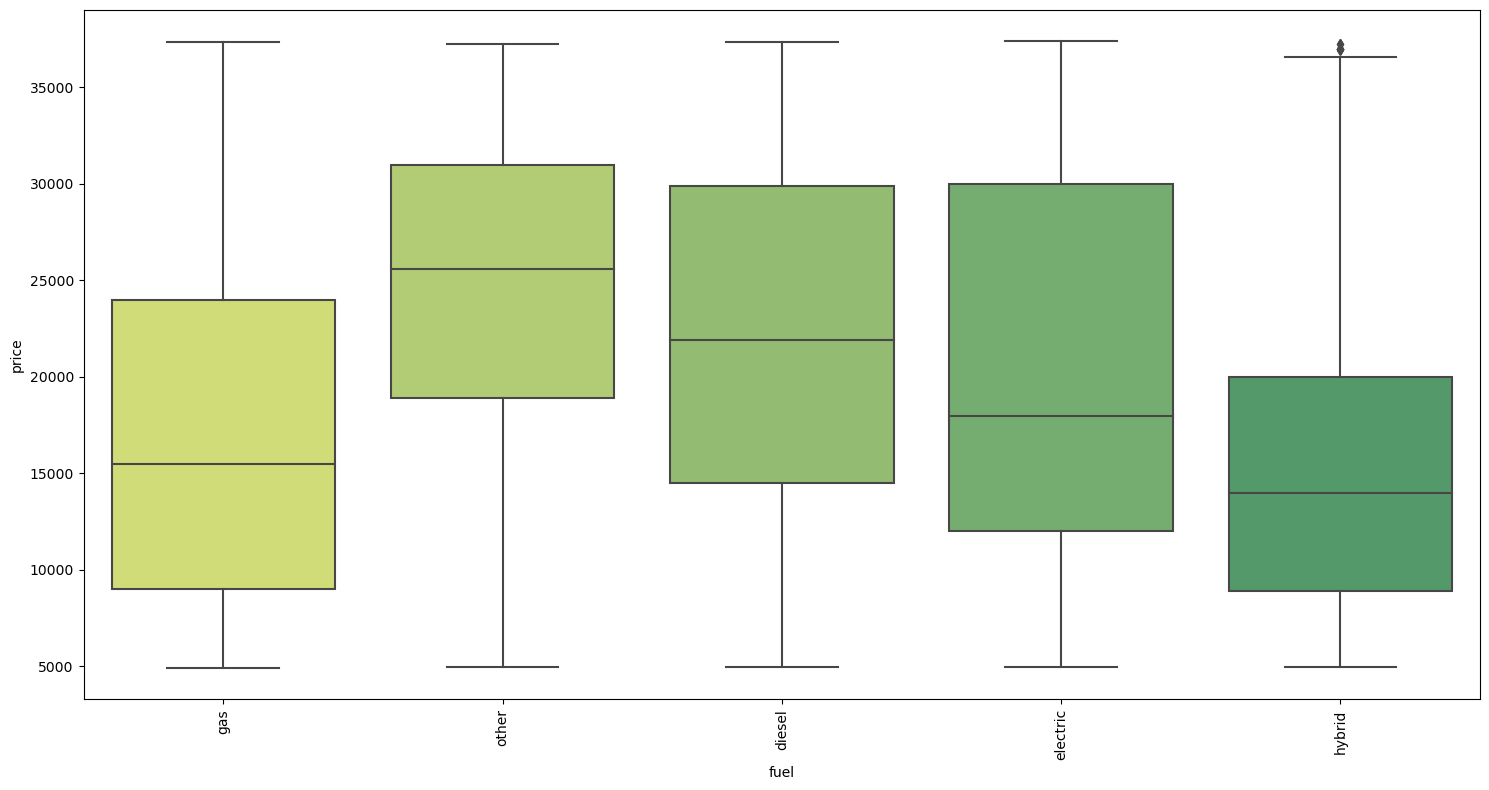

Q1  odometer  40146.75, Q3  odometer  126846.25
---------------------------------------
IQR for odometer is equal to 86699.5
---------------------------------------


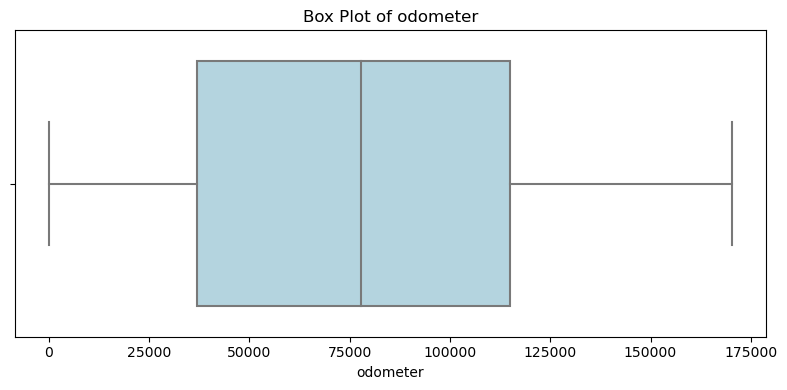

In [41]:
def boxplot_cat(name):
    fig = plt.figure(figsize=(15,8))
    sns.boxplot(data=df, x=name, y='price')
    plt.xticks(rotation=90)
    plt.show()
boxplot_cat('fuel')
upper_limit_odometer,lower_limit_odometer =IQR('odometer')
df = df[(df['odometer'] < upper_limit_odometer) & (df['odometer'] > 0)]
box_plot('odometer')

------------


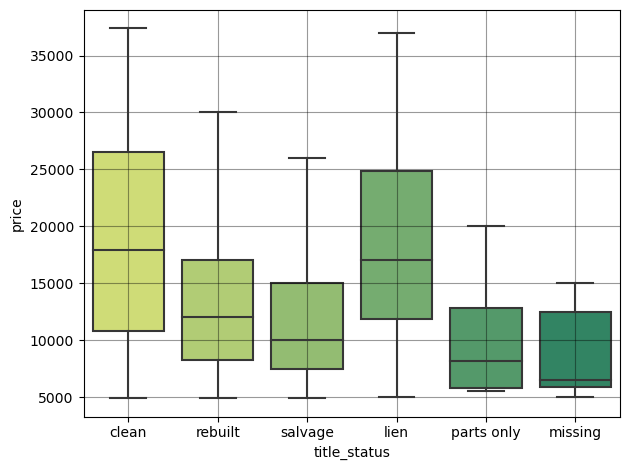

In [42]:
sns.boxplot(data=df,x='title_status',y='price',showfliers=False)
plt.grid(alpha=0.4,color ='k')

-------------

In [43]:
df1 = df.loc[:,['transmission','drive','type','price']]

In [44]:
df.transmission.info()

<class 'pandas.core.series.Series'>
Int64Index: 160805 entries, 4 to 290126
Series name: transmission
Non-Null Count   Dtype 
--------------   ----- 
160805 non-null  object
dtypes: object(1)
memory usage: 2.5+ MB


In [45]:
df.drive.isnull().sum()

37960

In [46]:
df.drive.value_counts()

fwd    50630
4wd    49358
rwd    22857
Name: drive, dtype: int64

In [47]:
# to create a model for predicting drive {4wd,rwd,fwd} we need to create dataset from dataset
data_drive = df[~df['drive'].isnull()]#include all data that is not null at drive column
# contain all rows which contain null values in drive column
data_nan_drive = df[df['drive'].isnull()][['cylinders','fuel','transmission','type']].dropna()

#select the columns that we can see that it is affect the drive(target)
data_drive = data_drive[['cylinders','fuel','transmission','type','drive']]


#data up to 200000+ to predict only 3 values thats enough for that
#we will drop all rows that contan NULL values

data_drive.dropna(inplace=True)
data_drive.reset_index(inplace=True,drop=True)


In [48]:
data_drive.drive.value_counts()

fwd    50630
4wd    49358
rwd    22857
Name: drive, dtype: int64

In [49]:
#Downsampling function
def returnDataWithSize(data,target,min_class):

    classes = dict(data[target].value_counts())
    
    index = np.array([])
    for clas in classes:
        
        class_index = data[data[target] == clas].index
        sample=list(np.random.choice(class_index,classes[min_class],replace=False))
        
        index = np.concatenate((sample,index))
    return data.iloc[index,:]

In [50]:
data_drive = returnDataWithSize(data_drive,'drive','rwd')

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix


for col in data_drive.iloc[:,0:-1]:
    encoder = LabelEncoder()
    data_drive[col] = encoder.fit_transform(data_drive[col])
    data_nan_drive[col] = encoder.transform(data_nan_drive[col])
    
X = data_drive.iloc[:,0:-1].values
y = data_drive.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape, y_train.shape

((54856, 4), (54856,))

In [59]:
RM = RandomForestClassifier(max_depth=10,max_features=4,min_samples_split=2,criterion='gini')

In [61]:
RM.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=4)

In [62]:
print(classification_report(y_test,RM.predict(X_test)))

              precision    recall  f1-score   support

         4wd       0.63      0.80      0.71      4582
         fwd       0.73      0.63      0.68      4593
         rwd       0.70      0.62      0.66      4540

    accuracy                           0.68     13715
   macro avg       0.69      0.68      0.68     13715
weighted avg       0.69      0.68      0.68     13715



In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160805 entries, 4 to 290126
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   year            160805 non-null  int32   
 1   manufacturer    160805 non-null  object  
 2   model           160805 non-null  object  
 3   condition       160805 non-null  object  
 4   cylinders       160805 non-null  object  
 5   fuel            160805 non-null  object  
 6   odometer        160805 non-null  float64 
 7   title_status    157794 non-null  object  
 8   transmission    160805 non-null  object  
 9   drive           122845 non-null  object  
 10  type            160805 non-null  object  
 11  paint_color     127348 non-null  object  
 12  state           160805 non-null  object  
 13  price           160805 non-null  int64   
 14  Odometer_Range  160805 non-null  category
dtypes: category(1), float64(1), int32(1), int64(1), object(11)
memory usage: 17.9+ MB


In [64]:
df[df.drive.isnull()][['cylinders','fuel','transmission','type','drive']][50:100]

,cylinders,fuel,transmission,type,drive
497,other,gas,automatic,other,NaN
507,other,other,other,hatchback,NaN
511,other,gas,automatic,SUV,NaN
532,other,other,other,sedan,NaN
540,other,gas,automatic,convertible,NaN
548,other,gas,automatic,other,NaN
552,other,other,automatic,pickup,NaN
554,other,gas,automatic,hatchback,NaN
556,6 cylinders,gas,automatic,coupe,NaN
570,4 cylinders,gas,automatic,sedan,NaN


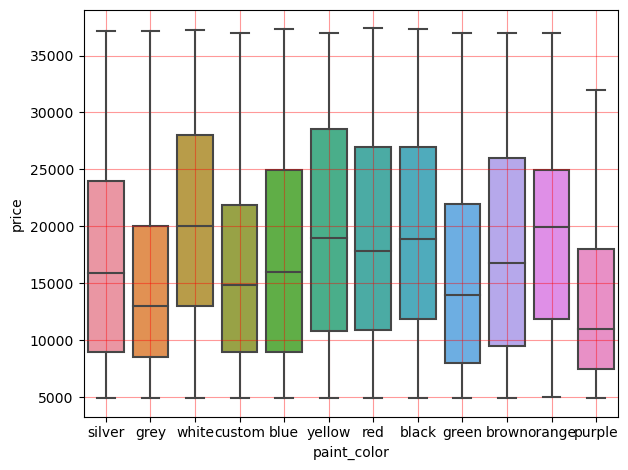

In [65]:
sns.boxplot(data=df,x='paint_color',y='price',showfliers=False)
plt.grid(alpha=0.4,color ='r')

---------------------
# modeling

In [66]:
from sklearn.linear_model import LinearRegression
new = df.dropna()
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100946 entries, 4 to 290125
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   year            100946 non-null  int32   
 1   manufacturer    100946 non-null  object  
 2   model           100946 non-null  object  
 3   condition       100946 non-null  object  
 4   cylinders       100946 non-null  object  
 5   fuel            100946 non-null  object  
 6   odometer        100946 non-null  float64 
 7   title_status    100946 non-null  object  
 8   transmission    100946 non-null  object  
 9   drive           100946 non-null  object  
 10  type            100946 non-null  object  
 11  paint_color     100946 non-null  object  
 12  state           100946 non-null  object  
 13  price           100946 non-null  int64   
 14  Odometer_Range  100946 non-null  category
dtypes: category(1), float64(1), int32(1), int64(1), object(11)
memory usage: 11.3+ MB


In [75]:
new.drop(labels=['model','state'],inplace=True,axis=1)

C:\Users\emana\AppData\Local\Temp\ipykernel_40980\812303513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.drop(labels=['model','state'],inplace=True,axis=1)


In [88]:
new.drop(['Odometer_Range'],inplace=True,axis=1)

C:\Users\emana\AppData\Local\Temp\ipykernel_40980\764697598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.drop(['Odometer_Range'],inplace=True,axis=1)


In [76]:
s = list(new.columns)

In [77]:
le = LabelEncoder()

new[['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color']]=new[['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
'paint_color']].apply(le.fit_transform)

C:\Users\emana\AppData\Local\Temp\ipykernel_40980\3431761821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new[['manufacturer',


In [78]:
new['odometer'] = new.odometer.astype('int64')

C:\Users\emana\AppData\Local\Temp\ipykernel_40980\81017292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['odometer'] = new.odometer.astype('int64')


In [90]:
new

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
4,15,19,2,5,2,138900,0,0,0,0,9,7995
8,11,19,5,5,2,157653,0,0,0,5,5,11995
14,5,19,2,3,2,73228,0,0,1,9,10,20988
17,5,15,2,3,2,14570,0,0,2,10,3,22900
25,6,19,0,7,2,90244,0,0,0,0,5,13988
...,...,...,...,...,...,...,...,...,...,...,...,...
290114,13,9,4,3,2,157000,0,0,1,9,5,5495
290115,14,19,5,5,2,146655,0,0,1,0,1,12995
290119,10,17,2,6,2,135000,0,0,0,10,10,20500
290120,4,15,4,5,2,39,4,0,0,10,10,25550


In [125]:
y= new.price
X= new.drop('price',axis=1)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [127]:
from sklearn.metrics import r2_score

In [128]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [129]:
r2_score(y_test,y_pred)

0.8720092893685003

In [130]:
test = pd.read_csv('test.csv')
test

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,316575,7313399730,2018.0,honda,civic,NaN,4 cylinders,gas,28898.0,clean,automatic,fwd,NaN,sedan,NaN,or,44.971430,-123.018548,2021-04-27T10:09:18-0700
1,97903,7308035814,2017.0,cadillac,cts 2.0 luxury sedan 4d,good,NaN,gas,41147.0,clean,other,NaN,NaN,sedan,red,fl,28.040000,-81.960000,2021-04-16T20:21:00-0400
2,357880,7317063645,2006.0,toyota,sienna,excellent,6 cylinders,gas,165500.0,clean,automatic,NaN,NaN,mini-van,grey,tx,32.737108,-97.084585,2021-05-04T20:45:23-0500
3,413008,7310376764,2016.0,mitsubishi,outlander sel sport,good,NaN,other,29430.0,clean,other,NaN,NaN,SUV,white,wi,43.700000,-87.740000,2021-04-21T11:20:50-0500
4,330300,7309848062,2017.0,audi,a6 3.0t premium plus sedan,good,6 cylinders,gas,24238.0,clean,automatic,NaN,NaN,sedan,white,pa,40.790000,-77.850000,2021-04-20T12:10:51-0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124336,221602,7306681704,2015.0,ram,3500,excellent,6 cylinders,diesel,123000.0,clean,automatic,rwd,NaN,NaN,white,mt,48.202800,-114.303900,2021-04-14T09:29:57-0600
124337,353429,7315798680,2007.0,nissan,murano.awd,NaN,NaN,gas,150000.0,rebuilt,automatic,NaN,NaN,NaN,NaN,tx,30.242800,-97.765800,2021-05-02T11:47:54-0500
124338,284120,7314818147,2015.0,dodge,dart sxt,excellent,4 cylinders,gas,90430.0,clean,automatic,fwd,NaN,NaN,white,oh,41.563600,-81.573300,2021-04-30T11:22:19-0400
124339,273569,7308055654,2001.0,chevrolet,2500,NaN,NaN,gas,137000.0,clean,automatic,NaN,NaN,NaN,NaN,ny,42.190134,-78.041382,2021-04-16T21:15:13-0400


In [131]:
new.columns

Index(['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'price'],
      dtype='object')

In [132]:
# drop the above feature
test.drop([ 'Unnamed: 0','model', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True)
test

,id,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,7313399730,2018.0,honda,NaN,4 cylinders,gas,28898.0,clean,automatic,fwd,sedan,NaN
1,7308035814,2017.0,cadillac,good,NaN,gas,41147.0,clean,other,NaN,sedan,red
2,7317063645,2006.0,toyota,excellent,6 cylinders,gas,165500.0,clean,automatic,NaN,mini-van,grey
3,7310376764,2016.0,mitsubishi,good,NaN,other,29430.0,clean,other,NaN,SUV,white
4,7309848062,2017.0,audi,good,6 cylinders,gas,24238.0,clean,automatic,NaN,sedan,white
...,...,...,...,...,...,...,...,...,...,...,...,...
124336,7306681704,2015.0,ram,excellent,6 cylinders,diesel,123000.0,clean,automatic,rwd,NaN,white
124337,7315798680,2007.0,nissan,NaN,NaN,gas,150000.0,rebuilt,automatic,NaN,NaN,NaN
124338,7314818147,2015.0,dodge,excellent,4 cylinders,gas,90430.0,clean,automatic,fwd,NaN,white
124339,7308055654,2001.0,chevrolet,NaN,NaN,gas,137000.0,clean,automatic,NaN,NaN,NaN


In [133]:
test.columns,new.columns

(Index(['id', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
        'odometer', 'title_status', 'transmission', 'drive', 'type',
        'paint_color'],
       dtype='object'),
 Index(['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
        'title_status', 'transmission', 'drive', 'type', 'paint_color',
        'price'],
       dtype='object'))

In [136]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color'],
      dtype='object')

In [137]:
test[['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color']]=test[['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
'paint_color']].apply(le.fit_transform)

In [138]:
test['year'] = 2023 - test['year']

In [139]:
test['year'] = test['year'].astype(int)
test['odometer'] = test['odometer'].astype(int)

In [140]:
test

,id,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,7313399730,5,16,6,3,2,28898,0,0,1,9,12
1,7308035814,6,6,2,8,2,41147,0,2,3,9,8
2,7317063645,17,38,0,5,2,165500,0,0,3,5,5
3,7310376764,7,29,2,8,4,29430,0,2,3,0,10
4,7309848062,6,3,2,5,2,24238,0,0,3,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...
124336,7306681704,8,33,0,5,0,123000,0,0,2,13,10
124337,7315798680,16,30,6,8,2,150000,4,0,3,13,12
124338,7314818147,8,10,0,3,2,90430,0,0,1,13,10
124339,7308055654,22,7,6,8,2,137000,0,0,3,13,12


In [141]:
pred = regressor.predict(test[wanted_test_columns])

In [142]:
pred

array([20131.95, 26382.7 ,  8999.75, ..., 12137.4 , 13176.35, 24871.35])

In [145]:
submission =pd.read_csv('Sample_Submition.csv')
submission

,id,Target
0,7313399730,0.0
1,7308035814,0.0
2,7317063645,0.0
3,7310376764,0.0
4,7309848062,0.0
...,...,...
124336,7306681704,0.0
124337,7315798680,0.0
124338,7314818147,0.0
124339,7308055654,0.0


In [146]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['id'] = test['id']
submission['Target'] =pred # our model predictions on the test dataset
submission

,id,Target
0,7313399730,20131.95
1,7308035814,26382.70
2,7317063645,8999.75
3,7310376764,27586.95
4,7309848062,27587.95
...,...,...
124336,7306681704,35595.50
124337,7315798680,13495.80
124338,7314818147,12137.40
124339,7308055654,13176.35


In [147]:
submission.to_csv('87_r2_submission.csv', index=False)

In [151]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

In [153]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=300,learning_rate=0.1)
ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [154]:
r2_score(y_test,y_pred)

0.876347529001359

In [156]:
pred = regressor.predict(test[wanted_test_columns])

In [157]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['id'] = test['id']
submission['Target'] =pred # our model predictions on the test dataset
submission

,id,Target
0,7313399730,20131.95
1,7308035814,26382.70
2,7317063645,8999.75
3,7310376764,27586.95
4,7309848062,27587.95
...,...,...
124336,7306681704,35595.50
124337,7315798680,13495.80
124338,7314818147,12137.40
124339,7308055654,13176.35


In [158]:
submission.to_csv('876_submission.csv', index=False)